In [2]:
import db_connect
import pandas
import matplotlib.pyplot as plt   # 資料視覺化套件
import matplotlib

In [3]:
# 建立與MySQL的連線
my_connt_obj = db_connect.mysql_connect()
conn = my_connt_obj.connect()

In [4]:
# 取得加權指數的資料
df_taiex = pandas.read_sql("SELECT * FROM StockTransactionInfo WHERE TradeDate >'2021-01-01'", con=conn)

In [5]:
# 關閉連線
conn.close() 

<AxesSubplot:xlabel='TradeDate'>

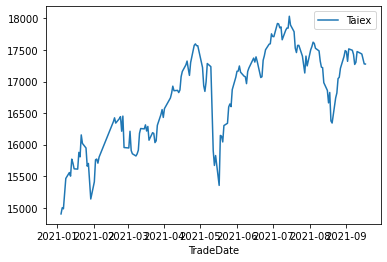

In [6]:
# 畫圖：加權指數
df_taiex.plot(x="TradeDate", y="Taiex")


In [7]:
# 取得最近六筆資訊
last_6_data = df_taiex[-6:]
last_6_data

,TradeDate,TranscationQty,TranscationAmount,TranscationCount,Taiex,ChangePoint,CreateTime
167,2021-09-10,5898868907,268550691237,1765201,17474.57,170.24,2021-09-10 22:55:16
168,2021-09-13,5932740401,260743193791,1837328,17446.31,-28.26,2021-09-13 23:01:22
169,2021-09-14,5669147686,261864808382,1863142,17434.90,-11.41,2021-09-15 22:11:16
170,2021-09-15,5732189159,269826160399,1935541,17354.00,-80.90,2021-09-15 22:11:16
171,2021-09-16,5750136284,242577208525,1872875,17278.70,-75.30,2021-09-16 22:59:12
172,2021-09-17,6567681323,316458676884,1948384,17276.79,-1.91,2021-09-20 23:44:20


In [8]:
last_6_data["TranscationAmount"].mean()

270003456536.33334

In [11]:
last_5_data = last_6_data["TranscationAmount"][0:-1]
print(last_5_data)
print(last_5_data.mean())

167    268550691237
168    260743193791
169    261864808382
170    269826160399
171    242577208525
Name: TranscationAmount, dtype: int64
260712412466.8


In [22]:
# 最近的一個交易日，比前五日的最大的金額更大
# signal_1: 最近交易日，是近期六天最大的交易金額

signal_1 = True if last_6_data["TranscationAmount"].iloc[-1] > last_5_data.max() else False
signal_1

True

In [23]:
# 最近的一個交易日的交易金額比更前五日的平均更多
# signal_2: 當交易比較熱絡的時候，顯示為True；反之，為False

signal_2 = True if last_6_data["TranscationAmount"].iloc[-1] > last_5_data.mean() else False
signal_2

True